# Machine Learning Algorithms
<b> This projects includes analysis and comparison of four well known machine learning algorithms.Performance measure is based on AUC- ROC matrix. AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability </b>
- Linear Discriminant Analysis
<br>
<img style="height:80px; width: 250px; float:center;" src ="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTfYgwaJl6mTT748MpLm4NKol1oWOhMnO_Row&usqp=CAU" />
<br>
- Logistic Regression
<br>
<img style="height:80px; width: 250px; float:center;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyWVORD87PLTHHtpBwwuVoy4RukUfAkC8U-Q&usqp=CAU" />
<br>
- K Nearest Neighbors
<br>
<img style="height:80px; width: 250px; float:center;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzhg73tLeQij9Awk0VYJJLwQ5skwM5HubDZQ&usqp=CAU" />
<br>
- Decision Tree
<br>
<img style="height:80px; width: 250px; float:center;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQQ5y0cJx5lj997BbCLSsGk2tMvh08Aj0UVKA&usqp=CAU" />

<hr>
<font color=Red size=3px><b>Notebook is created by:</b><font>
<font color=Red><b>Parvez ALi</b><font> 


In [1]:
# Important libraries needed to complete the project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools

## Exploratory Data Analysis
- <b> Data Wrangling </b>
    - Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable
- <b> Handling NAN value </b>
    - Use deletion methods to eliminate missing data.
- <b> Normalization </b>
    - Bringning data to same scale
- <b>Dealing with imbalance data </b>
    - Making number of observations equal for all classes
- <b>Label Encoding </b>
    - Encoding the classification classes with random numbers
- <b>Training Testing Data Split </b>
    - Split the data for training and testing purposes.

In [2]:
# Loading Dataset in Data Frame
breast_cancer_data=pd.read_csv('../input/original-dataset/Cancer Dataset Originol.csv')
# Checking dataset entries shape
breast_cancer_data.shape

(568, 1)

In [3]:
# Original Data has no columns. Give some name to column for now
breast_cancer_data.columns=["data"]

In [4]:
# Name the dataset columns Here is the list of column names.
Columns=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave_points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","preimeter_Se","area_se","smoothness_se","compactness_se","concavity_se","concave_points_se","symmetry_se","factal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave_points_worst","symmetry_worst","factal_dimension_worst"]

In [5]:
# data wrangling 
# split the data on "," to get all the 32 columns of the data
new=breast_cancer_data["data"].str.split(",",n=32,expand=True)

In [6]:
# Assign column names to our new datasets
new.columns=Columns

In [7]:
# Rename the dataset
breast_cancer_data=new
# Dataset after giving column names
breast_cancer_data.tail(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,factal_dimension_worst
548,923465,B,10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,...,13.03,31.45,83.9,505.6,0.1204,0.1633,0.06194,0.03264,0.3059,0.07626
549,923748,B,10.86,21.48,68.51,360.5,0.07431,0.04227,0,0,...,11.66,24.77,74.08,412.3,0.1001,0.07348,0,0,0.2458,0.06592
550,923780,B,11.13,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,...,12.02,28.26,77.8,436.6,0.1087,0.1782,0.1564,0.06413,0.3169,0.08032
551,924084,B,12.77,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.01499,...,13.87,36,88.1,594.7,0.1234,0.1064,0.08653,0.06498,0.2407,0.06484
552,924342,B,9.333,21.94,59.01,264,0.0924,0.05605,0.03996,0.01282,...,9.845,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393
553,924632,B,12.88,28.92,82.5,514.3,0.08123,0.05824,0.06195,0.02343,...,13.89,35.74,88.84,595.7,0.1227,0.162,0.2439,0.06493,0.2372,0.07242
554,924934,B,10.29,27.61,65.67,321.4,0.0903,0.07658,0.05999,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.171,0.2,0.09127,0.2226,0.08283
555,924964,B,10.16,19.59,64.73,311.7,0.1003,0.07504,0.005025,0.01116,...,10.65,22.88,67.88,347.3,0.1265,0.12,0.01005,0.02232,0.2262,0.06742
556,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0,0,...,10.49,34.24,66.5,330.6,0.1073,0.07158,0,0,0.2475,0.06969
557,925277,B,14.59,22.68,96.39,657.1,0.08473,0.133,0.1029,0.03736,...,15.48,27.27,105.9,733.5,0.1026,0.3171,0.3662,0.1105,0.2258,0.08004


In [8]:
#Check the null values in data if available
breast_cancer_data.isna().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave_points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_se                 0
texture_se                0
preimeter_Se              0
area_se                   0
smoothness_se             0
compactness_se            0
concavity_se              0
concave_points_se         0
symmetry_se               0
factal_dimension_se       0
radius_worst              0
texture_worst             0
perimeter_worst           0
area_worst                0
smoothness_worst          0
compactness_worst         0
concavity_worst           0
concave_points_worst      0
symmetry_worst            0
factal_dimension_worst    0
dtype: int64

In [9]:
# Check if the data is balanced or not
sum(breast_cancer_data.diagnosis=='M'),sum(breast_cancer_data.diagnosis=='B')

(211, 357)

In [10]:
# Separate the observations and labels
y=breast_cancer_data["diagnosis"]
X=breast_cancer_data.drop(["diagnosis"],axis=1)
type(X)

pandas.core.frame.DataFrame

In [11]:
# Encoding the labels
le=LabelEncoder()
ydf=pd.DataFrame(y)
ydf['diagnosis']=le.fit_transform(ydf.diagnosis)
y=ydf

In [12]:
# Convert the datatypes of data frame columns from object to float
X=X.astype(float)

In [13]:
# Before up sampling it's important to split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

In [14]:
# Shape of training and testing data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((454, 31), (114, 31), (454, 1), (114, 1))

In [15]:
# Concatenate the training data sample and labels
data_train=pd.concat([X_train,y_train],axis=1)
# Shape of training dataset
data_train.shape

(454, 32)

In [16]:
# Count the number of meligent observations and bengin observations in training dataset
meligent=data_train[data_train.diagnosis==1]
bengin=data_train[data_train.diagnosis==0]
meligent.shape, bengin.shape

((169, 32), (285, 32))

## Data Exploration

- <b> SMOTE Resampling method</b>
    - SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.
- <b>Data Distribution</b>
    - A distribution is simply a collection of data, or scores, on a variable. Usually, these scores are arranged in order from smallest to largest and then they can be presented graphically.
- <b>Covariance Matrix</b>
    - A covariance matrix is a generalization of the covariance of two variables and captures the way in which all variables in the dataset may change together. 
- <b>Pair plot from seaborn</b>
    - Pair plot is used to understand the best set of features to explain a relationship between two variables.
- <b>Standardization</b>
    - Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation $\frac{x_i-mean(x)}{std(x)}$.

In [17]:
from imblearn.over_sampling import SMOTE
resample1= SMOTE()


**Dealing with class Imbalance**
<hr>
- For upsampling the dataset, I have used two techniques here you can choose any of it both performs in similiar way in this case.

    -  SMOTE upsampling technique
        - SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. Specifically, a random example from the minority class is first chosen.
    -  Generating samples using resample library 
        - Resampling generates a unique sampling distribution on the basis of the actual data. We can apply various frequency to resample our time series data.
<hr>       
<font color="red">Note:<font> I have used resample library 

In [18]:
# SMOTE upsampling technique
X_train1, y_train1 = resample1.fit_resample(X_train, y_train)
X_train1.shape, y_train1.shape

((570, 31), (570, 1))

In [19]:
# Up sample meligent class 
# upsampling using resample library 
data_meligent_upsampled=resample(meligent,replace=True,n_samples=len(bengin),random_state=42)

In [20]:
# Concatenate the up sampled class of meligent with bengin
data_train_upsampled=pd.concat([data_meligent_upsampled,bengin])

In [21]:
# Shape of training data after up sampling
data_train_upsampled.shape

(570, 32)

In [22]:
# Check if the observation of classes are same now
sum(data_train_upsampled.diagnosis==1),sum(data_train_upsampled.diagnosis==0)

(285, 285)

In [23]:
# split the observations and labels
data_classes=data_train_upsampled['diagnosis']
data_train_observation=data_train_upsampled.drop(['diagnosis'],axis=1)

In [24]:
# Shape of training dataset 
data_classes.shape, data_train_observation.shape

((570,), (570, 31))

In [25]:
# Checking the datatype of any observation value 
dataArray=np.array(data_train_observation)
type(dataArray[:,1][2])

numpy.float64

In [26]:
# Select any of 5 features to visualize pair plot
selected5=X_train[["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean"]]

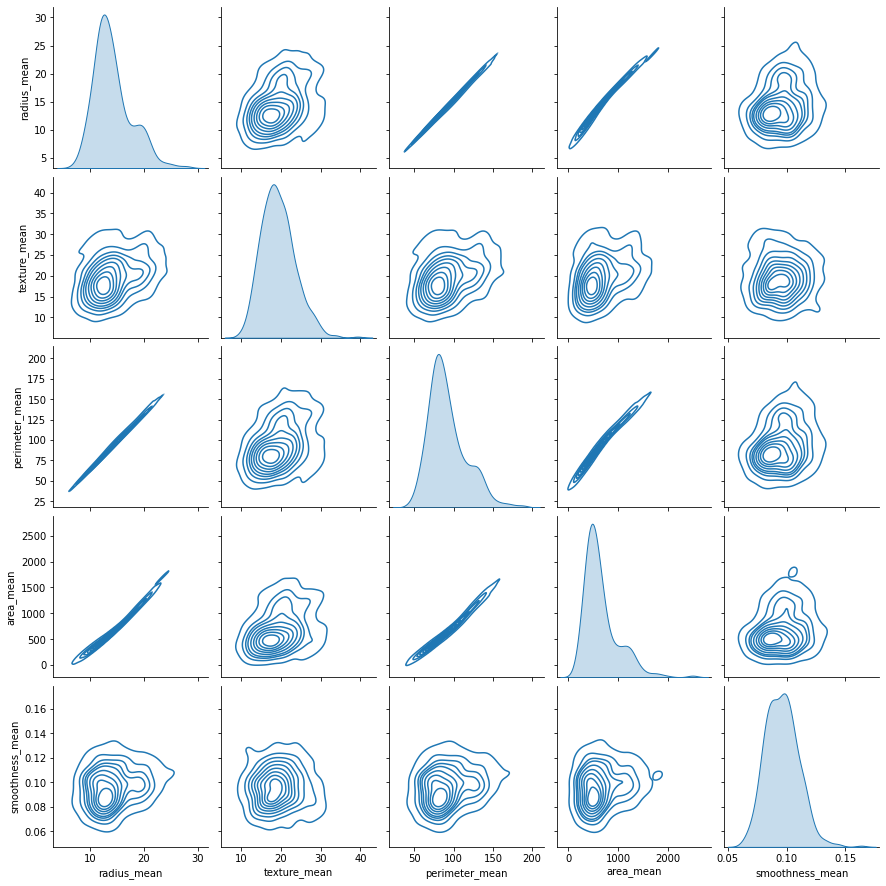

In [27]:
# Plotting pair plot 
sns.pairplot(selected5,kind='kde')

<AxesSubplot:>

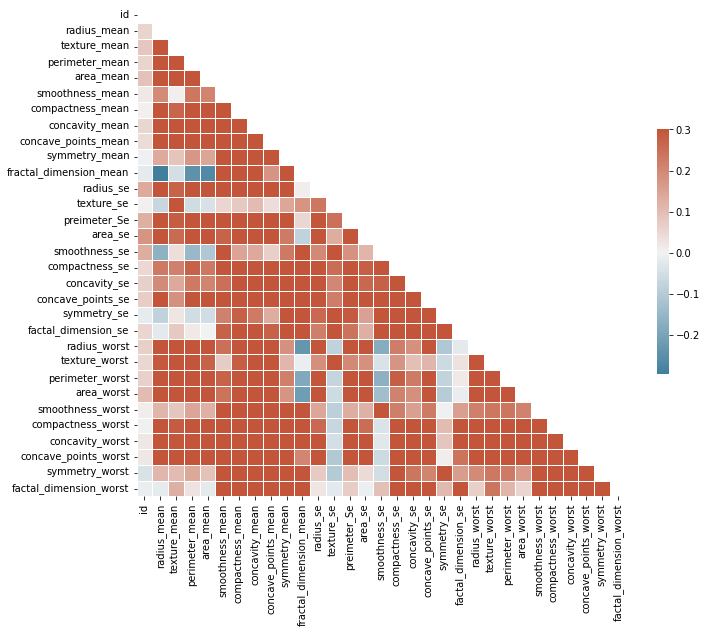

In [28]:
# Covariance matrix 
corr=X_train.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:ylabel='Density'>

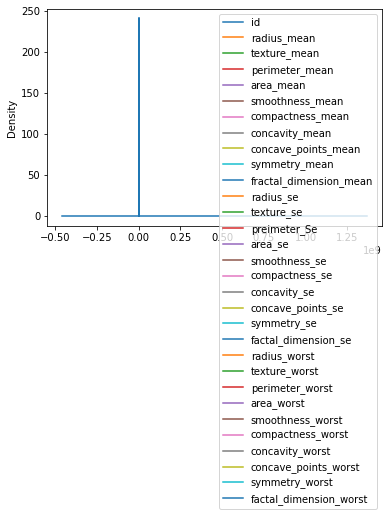

In [29]:
# Training Dataset scale visualization before standardizing
# see weather standardization is required or not
df1=pd.DataFrame(data_train_observation)
df1.plot.kde()

In [30]:
# Scaling Data
standardScaler=StandardScaler()

In [31]:
# Normalize the training dataset
scaled_data_train=standardScaler.fit_transform(data_train_observation)
# Normalize the testing dataset
scaled_data_test=standardScaler.transform(X_test)

<AxesSubplot:ylabel='Density'>

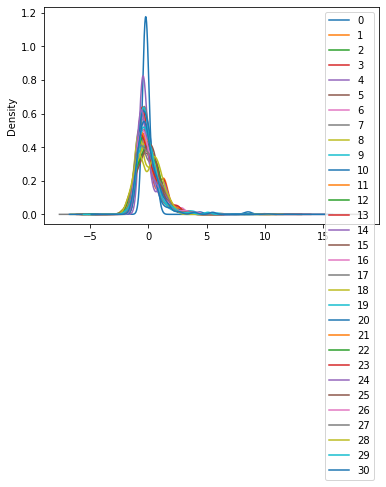

In [32]:
# Data density plot
df=pd.DataFrame(scaled_data_train)
df.plot.kde()

## Feature Selection/ Dimentionality Reduction
- K best selection technique to choose k features 
- PCA 
- You can go with any of techniques feature selection or dimensionality reduction
- I have used feature selection technique

In [33]:
from numpy import mean, std
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [34]:
# Normalized data
scaled_data_train
data_classes=np.array(data_classes)
data_classes.shape,scaled_data_train.shape

((570,), (570, 31))

In [35]:
lda=LinearDiscriminantAnalysis()

In [36]:
# Cross validation to find the optimal number of features out of 31 features
k_scores =[]
for k in range(1,31):
    scores=cross_val_score(lda,scaled_data_train[:,0:k],data_classes,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

Text(0, 0.5, 'cross-validation Accuracy')

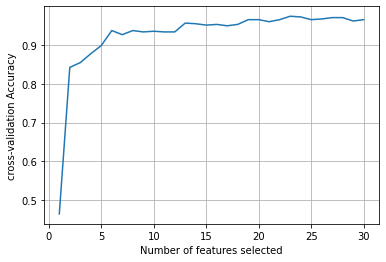

In [37]:
# plot the best features result and select optimal value of k features
%matplotlib inline

plt.plot(range(1,31),k_scores)
plt.grid()
plt.xlabel('Number of features selected')
plt.ylabel('cross-validation Accuracy')

In [38]:
# from above graph we can see that 15 features are enough 
# select best 15 features
from sklearn.feature_selection import SelectKBest,mutual_info_classif
selector= SelectKBest(k=15,score_func=mutual_info_classif)

In [39]:
# Selecting best features
features=selector.fit_transform(scaled_data_train,data_classes)

In [40]:
features.shape

(570, 15)

In [41]:
# Import PCA for dimentionlaity reduction
from sklearn.decomposition import PCA
pca_trans = PCA()

In [42]:
# Reducing dimentionality 
meta = pca_trans.fit_transform(scaled_data_train)

In [43]:
# Explained variance for each of the component
expl = pca_trans.explained_variance_ratio_
expl

array([4.32530081e-01, 2.06323003e-01, 8.69850855e-02, 6.11596249e-02,
       4.93297421e-02, 3.37842406e-02, 3.19224740e-02, 1.91158689e-02,
       1.37925294e-02, 1.18214549e-02, 9.79894606e-03, 9.28521725e-03,
       7.78542558e-03, 7.49270635e-03, 4.41411330e-03, 3.09103175e-03,
       2.18826710e-03, 1.61996056e-03, 1.52171587e-03, 1.24340672e-03,
       1.04631262e-03, 9.42389932e-04, 8.07512021e-04, 6.60427091e-04,
       4.70408376e-04, 3.80226648e-04, 2.45760647e-04, 1.66033745e-04,
       4.96539558e-05, 2.28848794e-05, 3.49517140e-06])

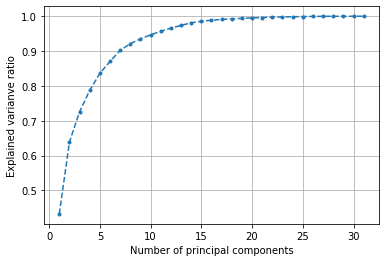

In [44]:
# plotting the component 
plt.plot(range(1,32),expl.cumsum(),'.--')
plt.xlabel('Number of principal components')
plt.ylabel('Explained varianve ratio')
plt.grid()
plt.show()

Text(0.5, 0, 'PC3')

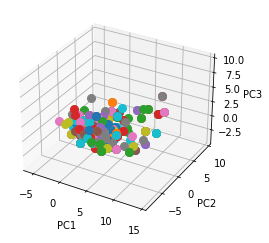

In [45]:
# Plot for three components in an 3d projection
# You can select and 3 random features to plot 3d projection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(300):
    ax.scatter(meta[i,0], meta[i,1], meta[i,2],s=64)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Algorithms training and comparison
- 10 fold cross validation testing
- roc_auc performance measure

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [47]:
# selecting optimal value of k using cross validation for KNN classifier
k_scores=[]
for k in range(1,10):
    knn1=KNeighborsClassifier(n_neighbors=k)
    scor=cross_val_score(knn1,features,data_classes,cv=10,scoring='accuracy')
    k_scores.append(scor.mean())

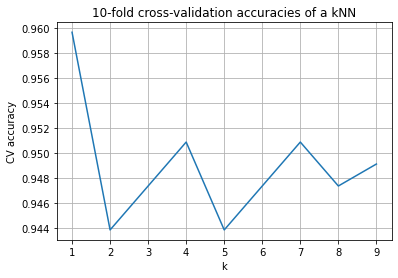

In [48]:
# optimum value for k is 1 
plt.plot(range(1,10),k_scores)
plt.title("10-fold cross-validation accuracies of a kNN")
plt.xlabel("k")
plt.ylabel("CV accuracy")
plt.grid()

In [49]:
# Selecting optimal value of tree depth using cross validation for DT.
k_scores1 = []
for k in range(1,10):
    dt1= DecisionTreeClassifier(max_depth=k)
    scor1 = cross_val_score(dt1, features, data_classes, cv=10, scoring = 'accuracy')
    k_scores1.append(scor1.mean())

Text(0, 0.5, 'CV accuracy')

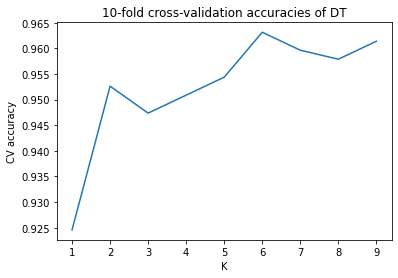

In [50]:
# optimum value of tree pruning is 6
plt.plot(range(1,10),k_scores1)
plt.title('10-fold cross-validation accuracies of DT')
plt.xlabel('K')
plt.ylabel('CV accuracy')

In [51]:
# Create variables for all models
lda=LinearDiscriminantAnalysis()
lr=LogisticRegression()
dt= DecisionTreeClassifier(criterion='gini', max_depth=6)
knn=KNeighborsClassifier(n_neighbors=1)

In [52]:
# Train all the models 
lda.fit(scaled_data_train,data_classes)
lr.fit(scaled_data_train,data_classes)
dt.fit(scaled_data_train,data_classes)
knn.fit(scaled_data_train,data_classes)

KNeighborsClassifier(n_neighbors=1)

In [53]:
# check the prediction scores of models 
print("LDA classification score",lda.score(scaled_data_test,y_test))
print("Logistic Regression score",lr.score(scaled_data_test,y_test))
print("Decision Tree score",dt.score(scaled_data_test,y_test))
print("KneighborsClassifier score",knn.score(scaled_data_test,y_test))

LDA classification score 0.9736842105263158
Logistic Regression score 0.9912280701754386
Decision Tree score 0.9473684210526315
KneighborsClassifier score 0.9649122807017544


In [54]:
# append scores in a list
prediction_score=[]
prediction_score.append(lda.score(scaled_data_test,y_test))
prediction_score.append(lr.score(scaled_data_test,y_test))
prediction_score.append(dt.score(scaled_data_test,y_test))
prediction_score.append(knn.score(scaled_data_test,y_test))

In [55]:
# 10 fold testing for models based on roc_auc performance measure
cvr = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
lda_score = cross_val_score(lda,features,data_classes,scoring = 'roc_auc',cv = cvr,n_jobs =1)
lr_score = cross_val_score(lr,features,data_classes,scoring = 'roc_auc',cv = cvr,n_jobs =1)
dt_score = cross_val_score(dt,features,data_classes,scoring = 'roc_auc',cv = cvr,n_jobs =1)
knn_score = cross_val_score(knn,features,data_classes,scoring = 'roc_auc',cv = cvr,n_jobs =1)

In [56]:
# Measure the mean score from 10 fold validation and standard deviation
cv_scores=[lda_score.mean(),lr_score.mean(),dt_score.mean(),knn_score.mean()]
cv_std=[lda_score.std(),lr_score.std(),dt_score.std(),knn_score.std()]
models=["LDA","LR","DT","KNN"]

Text(0, 0.5, 'Average Performance')

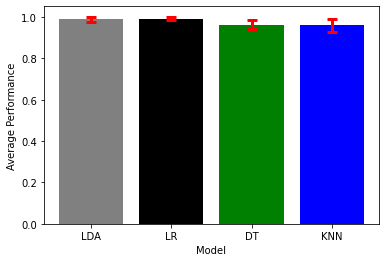

In [57]:
# Plotting error bar showing accuracy of algorithms with error
plt.errorbar( models, cv_scores, yerr=cv_std, fmt='.',
             color='red',elinewidth=3,
             capthick=3,errorevery=1, 
             alpha=1, ms=4, capsize = 5)
plt.bar(models, cv_scores,tick_label = models,color=['grey','black','green','blue'])##Bar plot
plt.xlabel('Model') ## Label on X axis
plt.ylabel('Average Performance') ##Label on Y axis

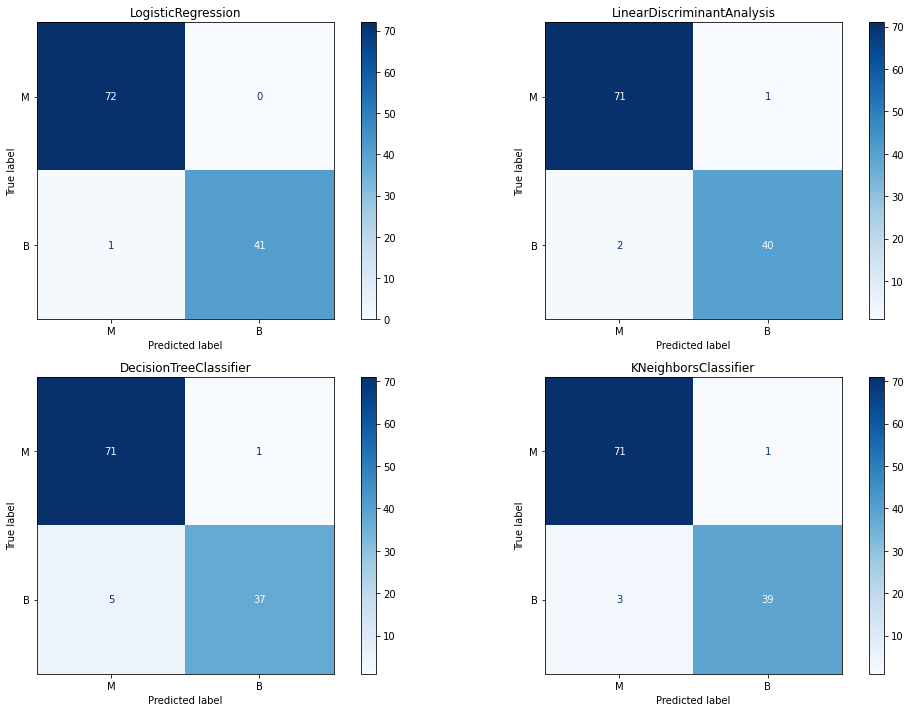

In [58]:
# Ploting confusion matrix 
from sklearn.metrics import plot_confusion_matrix
# Subplots for all four classifiers confusion matrices 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
classifiers = [lr, lda, dt, knn]
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          scaled_data_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=["M","B"])
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [59]:
# roc auc curve 
prob_lr=lr.predict_proba(scaled_data_test) 
prob_lda=lda.predict_proba(scaled_data_test) 
prob_dt=dt.predict_proba(scaled_data_test) 
prob_knn=knn.predict_proba(scaled_data_test) 


Dicision Tree: ROC AUC=0.933
Logistic: ROC AUC=0.998
LDA : ROC AUC = 0.997
KNN : ROC AUC = 0.957


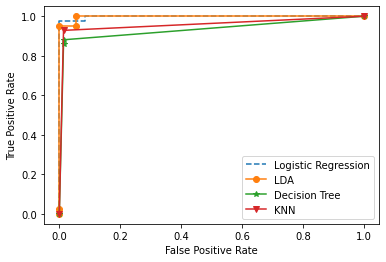

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
# roc curve for models
# keep probabilities for the positive outcome only
fpr1, tpr1, thresh1 = roc_curve(y_test, prob_lr[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, prob_lda[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, prob_dt[:,1],pos_label =1)
fpr4, tpr4, thresh4 = roc_curve(y_test, prob_knn[:,1],pos_label=1)
# roc curve for tpr = fpr 

# calculate scores
lda_auc = roc_auc_score(y_test, prob_lda[:,1])
dt_auc = roc_auc_score(y_test, prob_dt[:,1])
knn_auc = roc_auc_score(y_test, prob_knn[:,1])
lr_auc = roc_auc_score(y_test, prob_lr[:,1])
# summarize scores
print('Dicision Tree: ROC AUC=%.3f' % (dt_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('LDA : ROC AUC = %.3f' %(lda_auc))
print('KNN : ROC AUC = %.3f' %(knn_auc))
# plot the roc curve for the model
plt.plot(fpr1, tpr1, linestyle='--', label='Logistic Regression')
plt.plot(fpr2, tpr2, marker='o', label='LDA')
plt.plot(fpr3, tpr3, marker ='*', label = 'Decision Tree')
plt.plot(fpr4, tpr4, marker = 'v', label = 'KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Result:** 
-  For this cancer dataset, the test performance (i.e., auc_roc, performance_matrix) of the Logistic Regression classifier is higher than that of the LDA, DT and KNN classifiers for the same dataset, Though the difference is very negligible for LR and LDA.

**Reasons:**
- LDA works when all the independent/predictor variables are continuous (not categorical) and follow a Normal distribution.
- Whereas in Logistic Regression this is not the case and categorical variables can be used as independent variables while making predictions.
- LR is less sensitive to outliers and LR is good while binary classes. 
- As LDA is based on variance and mean, it can be affected by outliers. So, here this can also be reason why LR works better, because data is not too small.
- LDA perform well when data is small and linearly separable. 
- LDA also works better when multi class
- Decision tree works better in case of small data, this is the reason why LR and LDA has worked better than DT.
- While KNN is known as non-parametric classification model. KNN is based on distance measure, that's why its performance in this case is less than other classifiers.
